In [13]:
### Prelude

import pandas as pd
import geopandas as gpd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import glob
import os

### Read the data from the specified path and read the index to get the relevant JSONS i.e Identifiers for LSOA/MSOA/WARDS/BOUROUGS

In [36]:
path = "UK-GeoJSON-master\\json\\statistical\\eng\\oa_by_lsoa"
tesco_data_path = "Tesco_Data/"


# Load the data on the Ward Level 

df_tesco_lsoa = pd.read_csv(tesco_data_path + 'year_lsoa_grocery.csv', index_col = "area_id")

# Specifiy the JSON we want to merge
json_files = [pos_json for pos_json in os.listdir(path) if pos_json.endswith('.json') and pos_json.split('.')[0] in df_tesco_lsoa.index]

df_tesco_lsoa.head(10)

weight  weight_perc2.5  weight_perc25  weight_perc50  \
area_id                                                               
E01000001  308.119047            35.0          150.0          250.0   
E01000002  313.517874            40.0          150.0          250.0   
E01000003  315.084751            35.0          150.0          250.0   
E01000005  356.033437            38.0          150.0          280.0   
E01000006  451.262063            36.0          180.0          325.0   
E01000007  466.567666            30.0          165.0          325.0   
E01000008  448.551290            30.0          150.0          300.0   
E01000009  483.650451            37.5          170.0          300.0   
E01000010  425.420574            34.0          166.4          300.0   
E01000011  412.360523            34.0          155.0          300.0   

           weight_perc75  weight_perc97.5  weight_std  weight_ci95  \
area_id                                                              
E01000001          400.0            900.0  266.851723     2.359404   
E01000002          400.0            900.0  256.227843     2.833812   
E01000003          400.0           1000.0  292.462262     2.763918   
E01000005          450.0           1000.0  436.559315     2.554110   
E01000006          500.0           1500.0  666.655869     7.744708   
E01000007          500.0           2000.0  791.869582     9.389466   
E01000008          500.0           2000.0  727.678985    13.272186   
E01000009          500.0           2000.0  991.811922    13.465178   
E01000010          500.0           1500.0  718.133373     8.446340   
E01000011          500.0           1200.0  654.999082     8.945007   

               volume  volume_perc2.5  ...  man_day  population    male  \
area_id                                ...                                
E01000001   97.218600         15.0000  ...    16033      1296.0   685.0   
E01000002   88.262314         15.0000  ...     7829      1156.0   616.0   
E01000003  102.240558         15.0000  ...    15065      1350.0   713.0   
E01000005  113.968805         11.0000  ...    25128      1121.0   604.0   
E01000006  133.322097         10.0000  ...     5860      2040.0  1040.0   
E01000007  120.752310         20.0000  ...     6479      2101.0   999.0   
E01000008  129.176442         18.7225  ...     3236      1566.0   818.0   
E01000009  127.327271         10.0000  ...     4458      1775.0   957.0   
E01000010  121.434588          9.0000  ...     7493      3195.0  1732.0   
E01000011  121.128288         11.0000  ...     4343      1670.0   888.0   

           female  age_0_17  age_18_64  age_65+    avg_age  area_sq_km  \
area_id                                                                  
E01000001   611.0     179.0      766.0    351.0  48.293981        0.13   
E01000002   540.0     197.0      656.0    303.0  47.398789        0.23   
E01000003   637.0     152.0      850.0    348.0  48.360741        0.06   
E01000005   517.0     294.0      675.0    152.0  35.611954        0.19   
E01000006  1000.0     563.0     1317.0    160.0  32.080392        0.15   
E01000007  1102.0     653.0     1380.0     68.0  27.371252        0.20   
E01000008   748.0     582.0      938.0     46.0  27.298851        0.20   
E01000009   818.0     387.0     1229.0    159.0  34.318873        0.13   
E01000010  1463.0     878.0     2225.0     92.0  27.982473        0.35   
E01000011   782.0     443.0     1097.0    130.0  32.025748        0.09   

           people_per_sq_km  
area_id                      
E01000001            9985.0  
E01000002            5061.0  
E01000003           22843.0  
E01000005            5912.0  
E01000006           13915.0  
E01000007           10505.0  
E01000008            8027.0  
E01000009           13878.0  
E01000010            9074.0  
E01000011           18212.0  

[10 rows x 201 columns]

### Read all data from the Files into a single dataframe

In [67]:
df_lsoa = pd.concat([
    gpd.read_file(path +"//"+ json).assign(Ward = json.split(".")[0])
    for json in json_files
]).pipe(gpd.GeoDataFrame)

In [71]:
df_lsoa.head(50)

OA11CD    LAD11CD                                           geometry  \
0   E00000001  E09000001  POLYGON ((-0.09450 51.51976, -0.09579 51.52007...   
1   E00000003  E09000001  POLYGON ((-0.09630 51.51933, -0.09663 51.51972...   
2   E00000005  E09000001  POLYGON ((-0.09713 51.51862, -0.09705 51.51968...   
3   E00000007  E09000001  POLYGON ((-0.09713 51.51862, -0.09603 51.51847...   
4   E00000010  E09000001  POLYGON ((-0.09772 51.52292, -0.09691 51.52267...   
5   E00000012  E09000001  POLYGON ((-0.09649 51.52183, -0.09643 51.52221...   
6   E00000013  E09000001  POLYGON ((-0.09527 51.52050, -0.09652 51.52027...   
7   E00000014  E09000001  POLYGON ((-0.09638 51.52257, -0.09643 51.52221...   
8   E00000016  E09000001  POLYGON ((-0.09392 51.52077, -0.09404 51.52103...   
9   E00000017  E09000001  POLYGON ((-0.09252 51.51999, -0.09316 51.52085...   
10  E00000018  E09000001  POLYGON ((-0.09252 51.51999, -0.09104 51.51937...   
11  E00000019  E09000001  POLYGON ((-0.09252 51.51999, -0.09108 51.51973...   
12  E00000020  E09000001  POLYGON ((-0.09151 51.51857, -0.09104 51.51937...   
13  E00000021  E09000001  POLYGON ((-0.09020 51.51952, -0.08995 51.51998...   
14  E00000022  E09000001  POLYGON ((-0.09772 51.52292, -0.09679 51.52325...   
15  E00000023  E09000001  POLYGON ((-0.09510 51.52305, -0.09456 51.52205...   
16  E00000024  E09000001  MULTIPOLYGON (((-0.10414 51.50841, -0.10444 51...   
17  E00000025  E09000001  POLYGON ((-0.10950 51.51540, -0.10868 51.51526...   
18  E00000026  E09000001  POLYGON ((-0.10950 51.51540, -0.10925 51.51604...   
19  E00000027  E09000001  POLYGON ((-0.10182 51.51961, -0.09852 51.52054...   
20  E00000028  E09000001  POLYGON ((-0.10941 51.51790, -0.10980 51.51752...   
21  E00000029  E09000001  POLYGON ((-0.08004 51.51567, -0.07915 51.51632...   
22  E00000030  E09000001  POLYGON ((-0.07749 51.51554, -0.07673 51.51572...   
23  E00000031  E09000001  POLYGON ((-0.07749 51.51554, -0.07762 51.51562...   
24  E00000032  E09000001  POLYGON ((-0.07319 51.51257, -0.07524 51.51281...   
25  E00000035  E09000001  POLYGON ((-0.07927 51.50783, -0.07941 51.50784...   
26  E00166755  E09000001  POLYGON ((-0.07847 51.52151, -0.07943 51.51884...   
27  E00166756  E09000001  POLYGON ((-0.09652 51.52027, -0.09651 51.52024...   
28  E00166757  E09000001  POLYGON ((-0.09247 51.50950, -0.09532 51.51013...   
29  E00166758  E09000001  POLYGON ((-0.09603 51.51847, -0.09576 51.51879...   
30  E00166759  E09000001  POLYGON ((-0.09550 51.52171, -0.09538 51.52139...   
0   E00000137  E09000002  POLYGON ((0.13003 51.58570, 0.13015 51.58537, ...   
1   E00000138  E09000002  POLYGON ((0.13657 51.58366, 0.13684 51.58445, ...   
2   E00000139  E09000002  POLYGON ((0.13352 51.58393, 0.13336 51.58427, ...   
3   E00000140  E09000002  POLYGON ((0.13396 51.58245, 0.13394 51.58218, ...   
4   E00000141  E09000002  POLYGON ((0.14142 51.58268, 0.14131 51.58150, ...   
5   E00000142  E09000002  POLYGON ((0.13682 51.58063, 0.13605 51.58065, ...   
6   E00000143  E09000002  POLYGON ((0.13520 51.57974, 0.13510 51.58007, ...   
7   E00000144  E09000002  POLYGON ((0.14112 51.58054, 0.14097 51.57990, ...   
8   E00000145  E09000002  POLYGON ((0.13520 51.57974, 0.13514 51.57857, ...   
9   E00000147  E09000002  POLYGON ((0.13682 51.58063, 0.13686 51.57998, ...   
10  E00000148  E09000002  POLYGON ((0.13127 51.57790, 0.13366 51.57861, ...   
11  E00000156  E09000002  POLYGON ((0.13477 51.59256, 0.14190 51.59658, ...   
12  E00000157  E09000002  POLYGON ((0.13763 51.58898, 0.13668 51.58941, ...   
13  E00000158  E09000002  POLYGON ((0.13169 51.58651, 0.13083 51.58677, ...   
14  E00000159  E09000002  POLYGON ((0.14142 51.58268, 0.14072 51.58316, ...   
15  E00000160  E09000002  POLYGON ((0.13412 51.58649, 0.13351 51.58759, ...   
16  E00000161  E09000002  POLYGON ((0.12796 51.58695, 0.13101 51.58751, ...   
17  E00000162  E09000002  POLYGON ((0.12667 51.58608, 0.12763 51.58613, ...   
18  E00000163  E09000002  POLYGON ((0.13336 51.58427, 0.1

### Write the data to a file 

In [69]:
df_lsoa.to_file('lsoa_tesco_merged.geojson', driver='GeoJSON')

<AxesSubplot:>

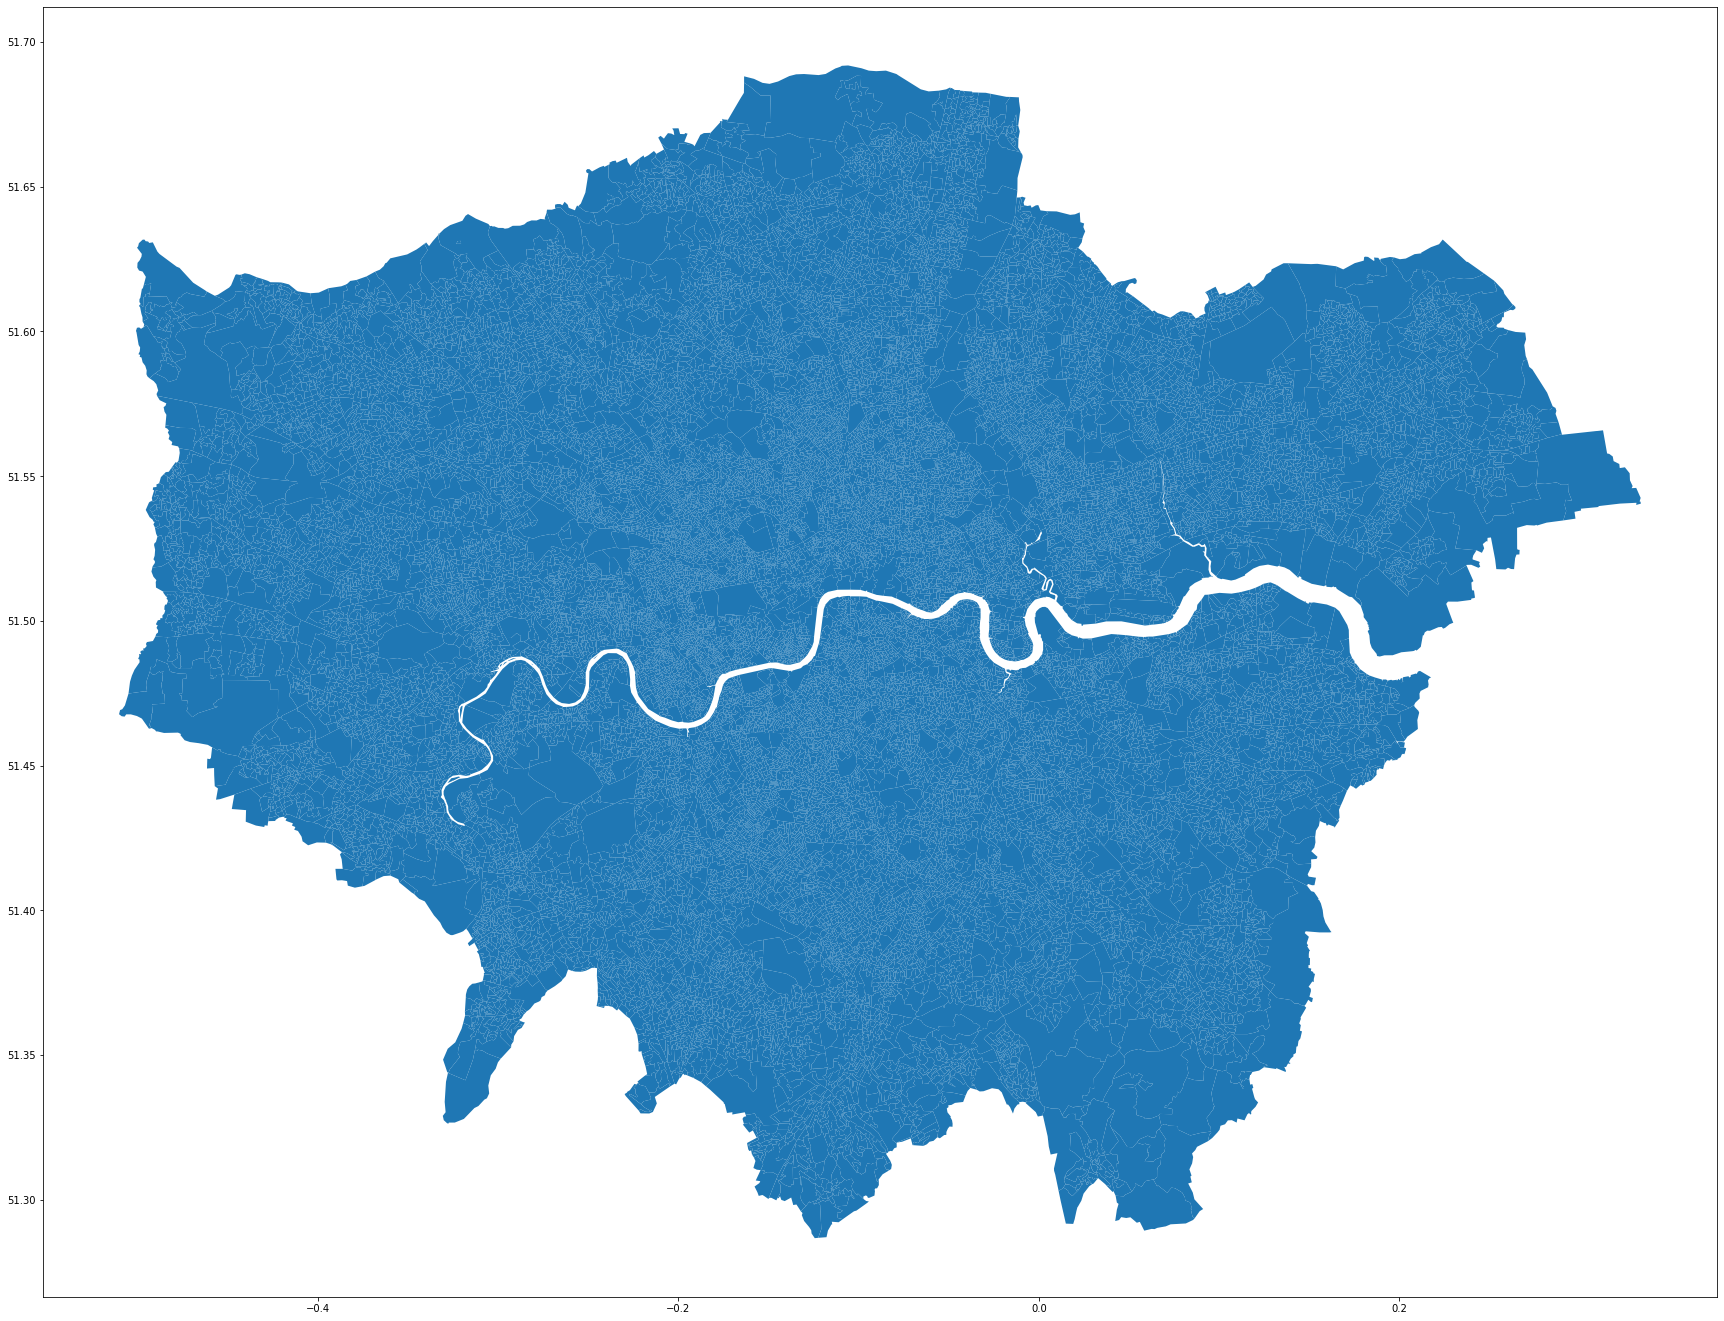

In [70]:
fig, ax = plt.subplots(1, 1, figsize =(30,30))
df_lsoa.plot(ax = ax)

In [62]:
path = "UK-GeoJSON-master\\json\\statistical\\eng\\oa_by_msoa"
df_tesco_msoa = pd.read_csv(tesco_data_path + 'year_msoa_grocery.csv', index_col = "area_id")
json_files = [pos_json for pos_json in os.listdir(path) if pos_json.endswith('.json') and pos_json.split('.')[0] in df_tesco_msoa.index]

df_msoa = pd.concat([gpd.read_file(path +"//"+ json).assign(Ward = json.split(".")[0]) for json in json_files]).pipe(gpd.GeoDataFrame)


In [66]:
df_msoa.to_file('msoa_tesco_merged.geojson', driver='GeoJSON')

<AxesSubplot:>

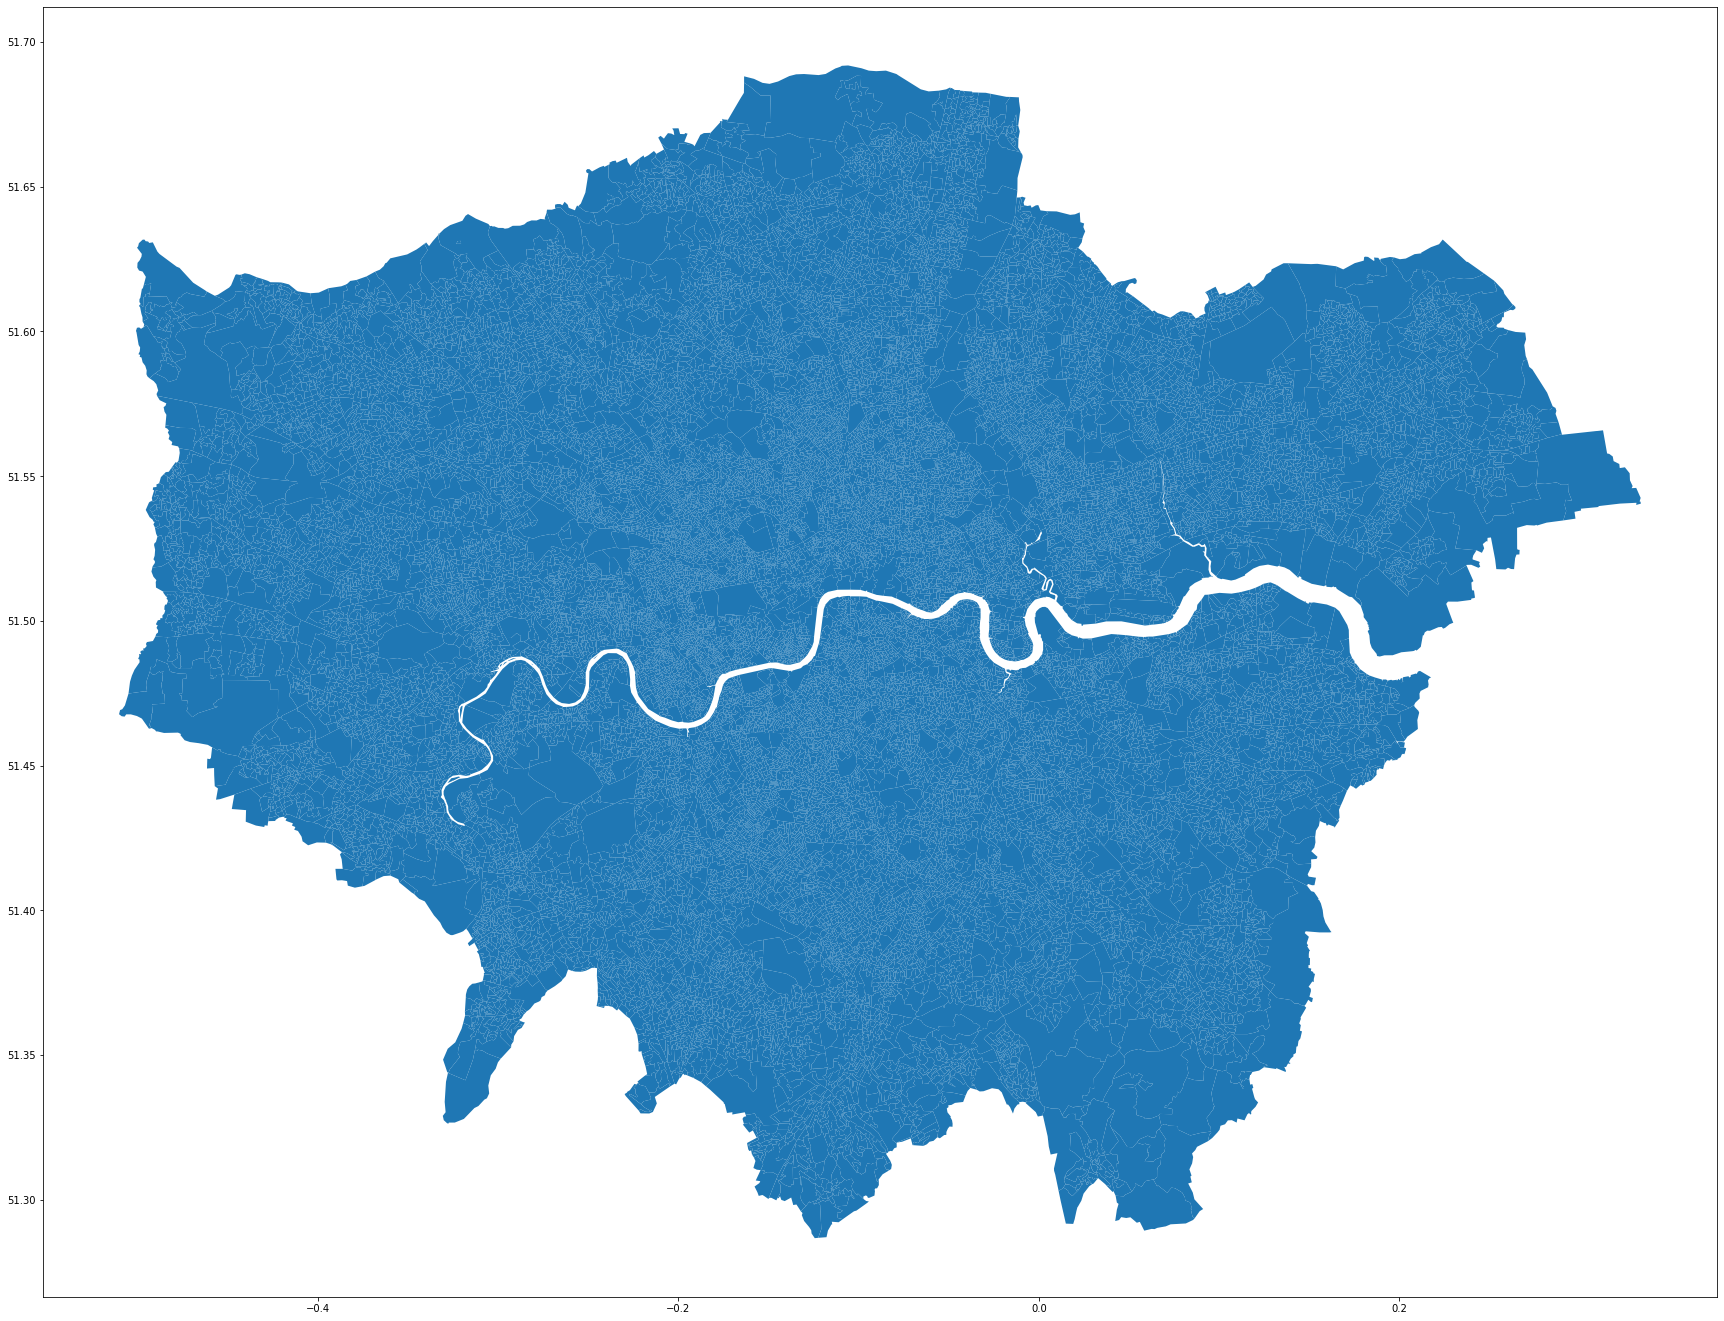

In [64]:
fig, ax = plt.subplots(1, 1, figsize =(30,30))
df_msoa.plot(ax = ax)

In [65]:
df_msoa.head(20)

OA11CD    LAD11CD                                           geometry  \
0   E00000001  E09000001  POLYGON ((-0.09450 51.51976, -0.09579 51.52007...   
1   E00000003  E09000001  POLYGON ((-0.09630 51.51933, -0.09663 51.51972...   
2   E00000005  E09000001  POLYGON ((-0.09713 51.51862, -0.09705 51.51968...   
3   E00000007  E09000001  POLYGON ((-0.09713 51.51862, -0.09603 51.51847...   
4   E00000010  E09000001  POLYGON ((-0.09772 51.52292, -0.09691 51.52267...   
5   E00000012  E09000001  POLYGON ((-0.09649 51.52183, -0.09643 51.52221...   
6   E00000013  E09000001  POLYGON ((-0.09527 51.52050, -0.09652 51.52027...   
7   E00000014  E09000001  POLYGON ((-0.09638 51.52257, -0.09643 51.52221...   
8   E00000016  E09000001  POLYGON ((-0.09392 51.52077, -0.09404 51.52103...   
9   E00000017  E09000001  POLYGON ((-0.09252 51.51999, -0.09316 51.52085...   
10  E00000018  E09000001  POLYGON ((-0.09252 51.51999, -0.09104 51.51937...   
11  E00000019  E09000001  POLYGON ((-0.09252 51.51999, -0.09108 51.51973...   
12  E00000020  E09000001  POLYGON ((-0.09151 51.51857, -0.09104 51.51937...   
13  E00000021  E09000001  POLYGON ((-0.09020 51.51952, -0.08995 51.51998...   
14  E00000022  E09000001  POLYGON ((-0.09772 51.52292, -0.09679 51.52325...   
15  E00000023  E09000001  POLYGON ((-0.09510 51.52305, -0.09456 51.52205...   
16  E00000024  E09000001  MULTIPOLYGON (((-0.10414 51.50841, -0.10444 51...   
17  E00000025  E09000001  POLYGON ((-0.10950 51.51540, -0.10868 51.51526...   
18  E00000026  E09000001  POLYGON ((-0.10950 51.51540, -0.10925 51.51604...   
19  E00000027  E09000001  POLYGON ((-0.10182 51.51961, -0.09852 51.52054...   

         Ward  
0   E02000001  
1   E02000001  
2   E02000001  
3   E02000001  
4   E02000001  
5   E02000001  
6   E02000001  
7   E02000001  
8   E02000001  
9   E02000001  
10  E02000001  
11  E02000001  
12  E02000001  
13  E02000001  
14  E02000001  
15  E02000001  
16  E02000001  
17  E02000001  
18  E02000001  
19  E02000001

In [45]:
df = gpd.read_file(path +"//"+ json_files[0])
df["Ward"] = json_files[0].split(".")[0]
df

OA11CD    LAD11CD                                           geometry  \
0  E00000001  E09000001  POLYGON ((-0.09450 51.51976, -0.09579 51.52007...   
1  E00000003  E09000001  POLYGON ((-0.09630 51.51933, -0.09663 51.51972...   
2  E00000005  E09000001  POLYGON ((-0.09713 51.51862, -0.09705 51.51968...   
3  E00000007  E09000001  POLYGON ((-0.09713 51.51862, -0.09603 51.51847...   
4  E00166756  E09000001  POLYGON ((-0.09652 51.52027, -0.09651 51.52024...   
5  E00166758  E09000001  POLYGON ((-0.09603 51.51847, -0.09576 51.51879...   

        Ward  
0  E01000001  
1  E01000001  
2  E01000001  
3  E01000001  
4  E01000001  
5  E01000001

In [54]:
df = gpd.read_file(path +"//"+ json_files[0]))
df

OA11CD    LAD11CD                                           geometry  \
0  E00000001  E09000001  POLYGON ((-0.09450 51.51976, -0.09579 51.52007...   
1  E00000003  E09000001  POLYGON ((-0.09630 51.51933, -0.09663 51.51972...   
2  E00000005  E09000001  POLYGON ((-0.09713 51.51862, -0.09705 51.51968...   
3  E00000007  E09000001  POLYGON ((-0.09713 51.51862, -0.09603 51.51847...   
4  E00166756  E09000001  POLYGON ((-0.09652 51.52027, -0.09651 51.52024...   
5  E00166758  E09000001  POLYGON ((-0.09603 51.51847, -0.09576 51.51879...   

        Ward  
0  E01000001  
1  E01000001  
2  E01000001  
3  E01000001  
4  E01000001  
5  E01000001

<AxesSubplot:>

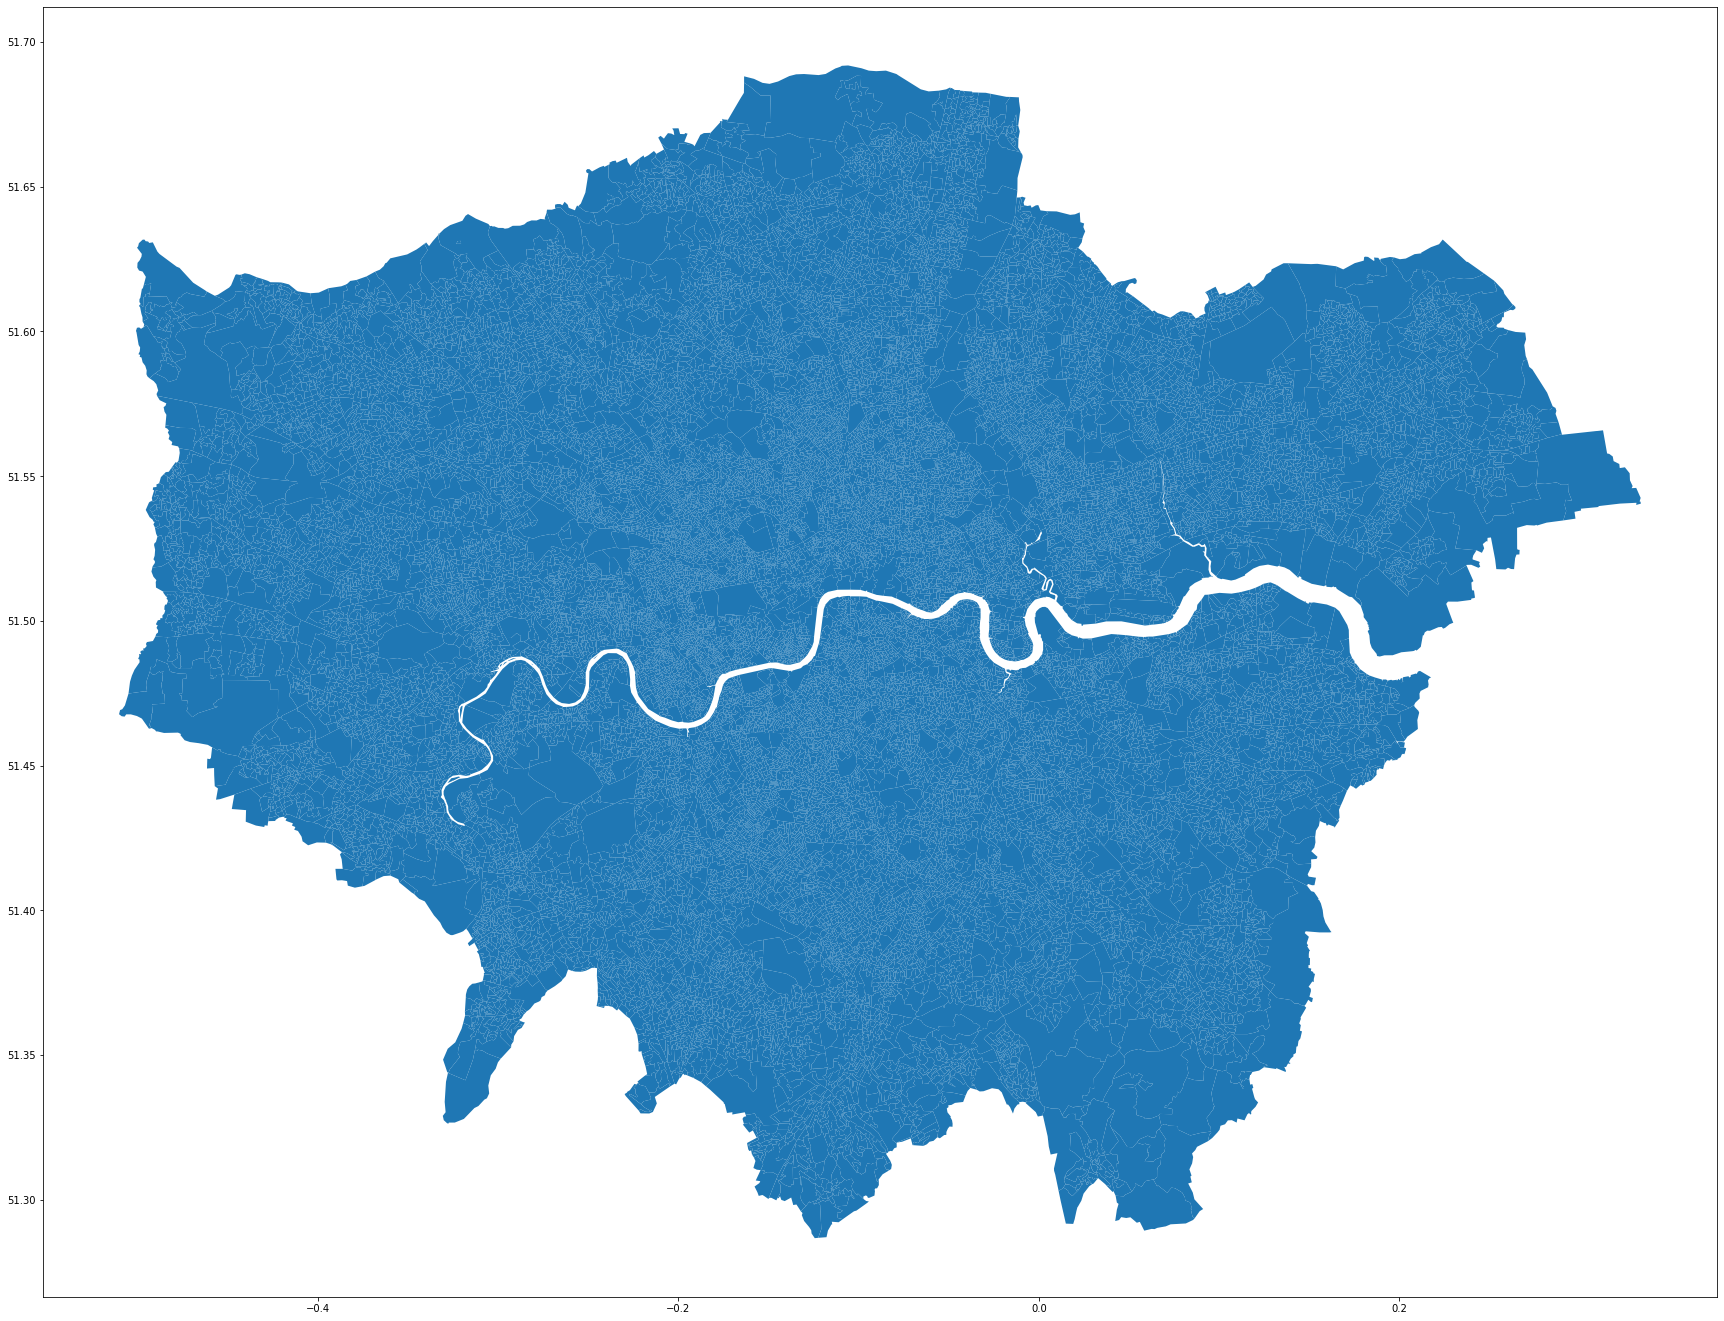

In [76]:
fig, ax = plt.subplots(1, 1, figsize =(30,30))
gpd.read_file("lsoa_tesco_merged.geojson").plot(ax = ax)